# How to build a Docker image with an Anaconda environment in

Paperspace?

[Paperspace](https://www.paperspace.com/) is an affordable tool for
obtaining cloud compute power. Using it, you can run jupyter notebooks,
python scripts, or just about anything, provided you can write the right
Docker file. Plus some of the compute instances also come with GPUs,
making Paperspace an alternative to [Google
Colab](https://colab.research.google.com/). In contrast with Google
Colab though, Paperspace saves the files you use, so they are there when
you return. Inspired by Alex’s post on [Building my own image to use
IceVision with
Paperspace](https://mlops.systems/tools/docker/computervision/2022/03/25/paperspace-docker-icevision.html),
in this post I’ll describe how you can build a docker image to wrap an
Anaconda environment, and then run it on Paperspace. The Dockerfile and
Anaconda environment I used are available on Github
[here](https://github.com/krishanr/paperspaceconda).

The context for this post is that even though a custom anaconda
environment can be created and run in the Paperspace images that are
readily available, for longer projects, it would be useful to use a
Paperspace image that comes prebuilt with a desired environment.

We can do this by adding a few additional lines to the standard
Paperspace Docker image. Any anconda environment available at
‘environment.yml’ can be created and activated using these 4 lines:

``` dockerfile
ADD environment.yml $APP_HOME/environment.yml
RUN conda env create -f $APP_HOME/environment.yml

ENV PATH $CONDA_DIR/envs/tf2/bin:$PATH
RUN echo "source activate tf2" > ~/.bashrc
```

The first two commands add the conda environment file to the Docker
containers workspace, and then create the conda environment.

The third command adds the enviornment directory to the PATH enviroment
variable. The directory path contains the environment name, which in
this case is tf2 (replace this with your environment name if necessary).
Finally, the last command adds a command to activate the enviornment to
the bashrc file, so that the environment is activated when the container
is started.

That’s it! The bulk of the work for creating and running a Docker image
with an anaconda environment in Paperspace is done with the above 4
lines of code.

The entire Dockerfile is available on GitHub
[here](https://github.com/krishanr/paperspaceconda/blob/master/Dockerfile).

Following
[Alex](https://mlops.systems/tools/docker/computervision/2022/03/25/paperspace-docker-icevision.html),
I’ll describe the steps to setup a Paperspace instance using this
Dockerfile.

First go to your notebooks inside a project, and create a new Paperspace
notebook.

<figure>
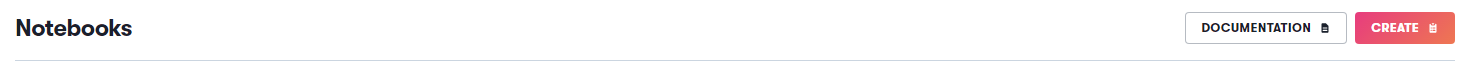
<figcaption aria-hidden="true">text</figcaption>
</figure>

Next, choose a GPU instance to create the notebook (or CPU depending on
the project), for example the RTX5000 option, and an automatic shutdown
of 6 hours.

<figure>
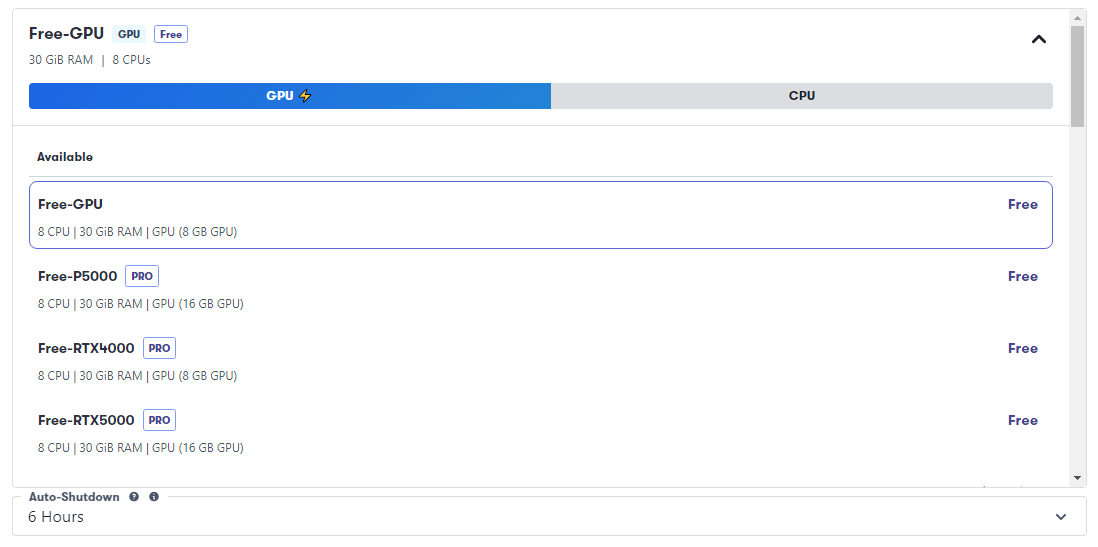
<figcaption aria-hidden="true">text</figcaption>
</figure>

Next the Dockerfile will have to be built and pushed to Dockerhub,
before it can be used with paperspace.

To build the Dockerfile, just run

``` bash
docker build -t k2rajara/paperspace:3.0 .
```

for example, in the same directory as the Dockerfile.

In the above code, ‘k2rajara/paperspace’ is the [container
name](https://hub.docker.com/r/k2rajara/paperspace) on Dockerhub. To
create your own repository on Dockerhub, follow the instructions
[here](https://docs.docker.com/docker-hub/). Then push your image there.
Once this is complete, its details can be added to the advanced section:

<figure>
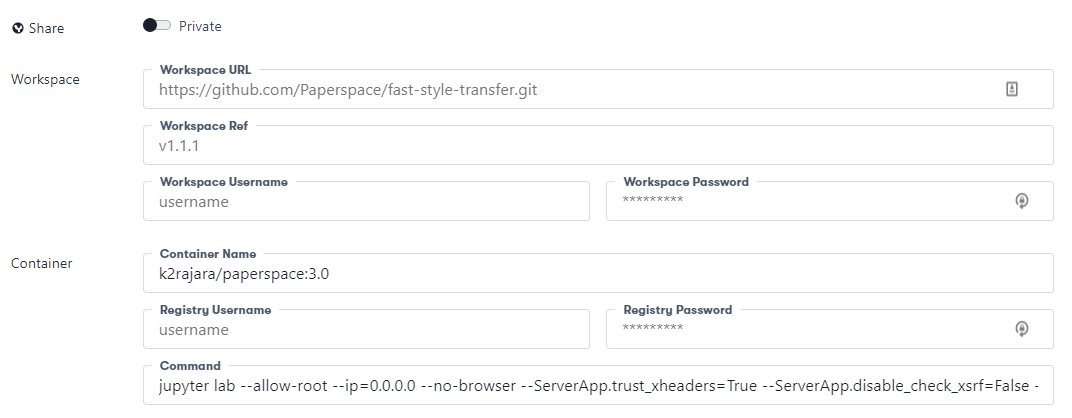
<figcaption aria-hidden="true">text</figcaption>
</figure>

The command that is run in the container is the default one for
Paperspace:

``` bash
jupyter lab --allow-root --ip=0.0.0.0 --no-browser --ServerApp.trust_xheaders=True --ServerApp.disable_check_xsrf=False --ServerApp.allow_remote_access=True --ServerApp.allow_origin='*' --ServerApp.allow_credentials=True
```

Finally after clicking “Start Notebook”, Paperspace should pull the
image from Dockerhub and run jupyter lab as requested.

In my case, the conda environment I created is available on Github
[here](https://github.com/krishanr/paperspaceconda/blob/master/environment.yml)
and shown here:

``` yaml
name: tf2
channels:
  - conda-forge
  - defaults
  - anaconda
dependencies:
- python=3.6
- pip=21
- jupyterlab
- jupyter_client=7.1.0
- jupyter_server=1.13.1
- tensorflow-gpu=2.2
- pip:
  - mlflow==1.11.0
  - python-dotenv==0.15.0
  - matplotlib==3.1.2
  - Pillow==8.0.1
  - scikit-image==0.17.2
  - ruamel_yaml==0.16.12
```

The project I was working on used python 3.6, and tensorflow 2.2. Due to
the outated version of python, I also had to install the jupyter client
and server manually, to avoid bugs. However, the environment can be
customized depending on your project requirements.

For example, to create a minimal installation with tensorflow2 and
jupyterlab, use:

``` yaml
name: tf2
channels:
  - anaconda
dependencies:
- jupyterlab
- tensorflow-gpu
```